In [39]:
import pandas as pd
knjige = pd.read_csv("knjige.csv", index_col="id knjige", sep=";")
# pd.options.display.max_rows = 20

In [40]:
knjige.head(10)

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
2641,A Room with a View,English,2001,120189,84.8
2701,"Moby Dick; Or, The Whale",English,2001,114845,73.3
17157,Gulliver's Travels into Several Remote Regions...,English,2005,95656,65.5
158,Emma,English,1994,92822,71.2
84,"Frankenstein; Or, The Modern Prometheus",English,1993,93237,65.0
1080,A Modest ProposalFor preventing the children o...,English,1997,91904,37.3
100,The Complete Works of William Shakespeare,English,1994,91703,83.0
3186,"The Mysterious Stranger, and Other Stories",English,2008,84524,76.5
10554,"Right Ho, Jeeves",English,2004,83516,83.5


In [41]:
knjige[["naslov", "stevilo prenosov"]]

,naslov,stevilo prenosov
id knjige,,
2641,A Room with a View,120189
2701,"Moby Dick; Or, The Whale",114845
17157,Gulliver's Travels into Several Remote Regions...,95656
158,Emma,92822
84,"Frankenstein; Or, The Modern Prometheus",93237
...,...,...
1079,"The life and opinions of Tristram Shandy, gent...",39899
1200,Gargantua and Pantagruel,39874
50290,Space Station 1,39874


In [42]:
knjige[knjige["datum objave"]==2001]

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
2641,A Room with a View,English,2001,120189,84.8
2701,"Moby Dick; Or, The Whale",English,2001,114845,73.3
2542,A Doll's House : a play,English,2001,54319,86.6
2643,The History of John Bull,English,2001,50762,75.1
2638,The Idiot,English,2001,43732,80.9
2527,The Sorrows of Young Werther,English,2001,41025,77.4


In [43]:
lahke_knjige = knjige[knjige["tezavnost"] <= 50.0]
lahke_knjige

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
1080,A Modest ProposalFor preventing the children o...,English,1997,91904,37.3
2160,The Expedition of Humphry Clinker,English,2000,78912,46.7
6761,The Adventures of Ferdinand Count Fathom — Com...,English,2004,55323,38.0
4085,The Adventures of Roderick Random,English,2003,53800,49.2
25305,Memoirs of Fanny HillA New and Genuine Edition...,English,2008,43955,35.8


In [48]:
zanri = pd.read_csv("zanri_knjige.csv", index_col="id zanra", sep=";")

In [49]:
knjige_in_zanri = pd.merge(knjige, zanri, left_on = "id knjige", right_on="id zanra")
knjige_in_zanri

,naslov,jezik,datum objave,stevilo prenosov,tezavnost,id knjige
0,"Moby Dick; Or, The Whale",English,2001,114845,73.3,174
1,"History of Tom Jones, a Foundling",English,2004,78328,58.0,18857
2,Alice's Adventures in Wonderland,English,2008,62488,87.5,2701
3,A Doll's House : a play,English,2001,54319,86.6,24022
4,Mansfield Park,English,1994,41577,66.3,289
5,Mansfield Park,English,1994,41577,66.3,236
6,The Return of Sherlock Holmes,English,2006,41564,81.8,521
7,The Return of Sherlock Holmes,English,2006,41564,81.8,47


In [50]:
osebe = pd.read_csv("osebe.csv", index_col="id osebe", sep=";")
osebe_knjige = pd.read_csv("osebe_knjige.csv", index_col="id osebe", sep=";")

avtorji = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "A"], left_on="id osebe", right_on="id osebe")
avtorji

,oseba,id knjige,vloga
id osebe,,,
975,"Forster, E. M. (Edward Morgan), 1879-1970",2641,A
9,"Melville, Herman, 1819-1891",2701,A
326,"Swift, Jonathan, 1667-1745",17157,A
326,"Swift, Jonathan, 1667-1745",1080,A
68,"Austen, Jane, 1775-1817",158,A
...,...,...,...
100,"Chopin, Kate, 1850-1904",160,A
1269,"Jonson, Ben, 1573?-1637",4081,A
419,"Sterne, Laurence, 1713-1768",1079,A


In [51]:
prevajalci = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "P"], left_on="id osebe", right_on="id osebe")
prevajalci

,oseba,id knjige,vloga
id osebe,,,
2877,"Wall, Charles Heron",9070,P
2858,"Garnett, Constance, 1861-1946",2554,P
2858,"Garnett, Constance, 1861-1946",13415,P
36279,"Firebaugh, W. C.",5225,P
1463,"Brereton, Cloudesley, 1863-1937",4352,P
1464,"Rothwell, Fred, 1869-1934",4352,P
4931,"Derbyshire, Charles E.",10676,P
5476,"Wallis, Keene",14323,P
1681,"Murray, Gilbert, 1866-1957",27673,P


In [52]:
ilustratorji = pd.merge(osebe, osebe_knjige[osebe_knjige["vloga"] == "I"], left_on="id osebe", right_on="id osebe")
ilustratorji

,oseba,id knjige,vloga
id osebe,,,
26815,"Brock, C. E. (Charles Edmund), 1870-1938",394,I
6202,"Merrill, Frank T., 1848-1923",37106,I
4488,"Ralph, Lester",8525,I
53048,"Forte, John R. (John Robert), 1918-1966",64820,I
35627,"Ebel, Alex, 1932-2013",32032,I
6335,"Rackham, Arthur, 1867-1939",60976,I
6335,"Rackham, Arthur, 1867-1939",24022,I
1588,"Lindsay, Norman, 1879-1969",7700,I
1896,"Doré, Gustave, 1832-1883",1200,I


In [53]:
nemske = knjige[knjige["jezik"]=="German" ]
nemske

,naslov,jezik,datum objave,stevilo prenosov,tezavnost
id knjige,,,,,
24571,Der Struwwelpeteroder lustige Geschichten und ...,German,2008,51165,81.9


In [ ]:
stevilo_prenosov_glede_na_tezavnost = knjige[["stevilo prenosov", "tezavnost"]]
stevilo_prenosov_glede_na_tezavnost

,stevilo prenosov,tezavnost
id knjige,,
2641,120189,84.8
2701,114845,73.3
17157,95656,65.5
158,92822,71.2
84,93237,65.0
...,...,...
1079,39899,54.1
1200,39874,68.9
50290,39874,74.2


<Axes: xlabel='stevilo prenosov', ylabel='tezavnost'>

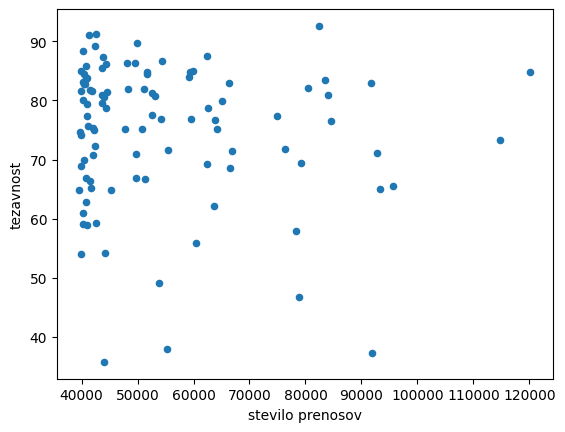

In [65]:
import matplotlib.pyplot as plt
stevilo_prenosov_glede_na_tezavnost.plot.scatter(x="stevilo prenosov", y="tezavnost", title="")

In [67]:
knjige["v_tisoc"] = (knjige["stevilo prenosov"] // 1000)
knjige

,naslov,jezik,datum objave,stevilo prenosov,tezavnost,v_tisoc
id knjige,,,,,,
2641,A Room with a View,English,2001,120189,84.8,120
2701,"Moby Dick; Or, The Whale",English,2001,114845,73.3,114
17157,Gulliver's Travels into Several Remote Regions...,English,2005,95656,65.5,95
158,Emma,English,1994,92822,71.2,92
84,"Frankenstein; Or, The Modern Prometheus",English,1993,93237,65.0,93
...,...,...,...,...,...,...
1079,"The life and opinions of Tristram Shandy, gent...",English,1997,39899,54.1,39
1200,Gargantua and Pantagruel,English,2004,39874,68.9,39
50290,Space Station 1,English,2015,39874,74.2,39


<Axes: xlabel='v_tisoc', ylabel='tezavnost'>

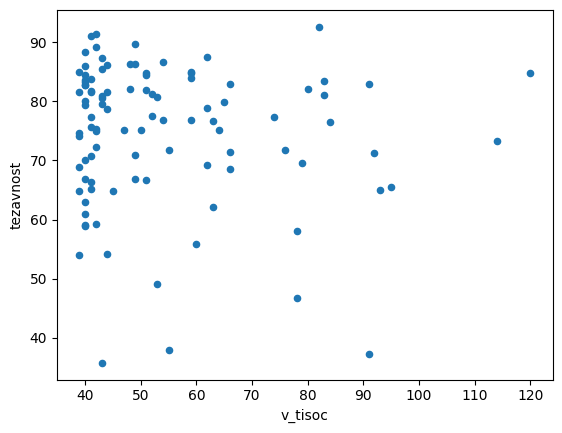

In [68]:
stevilo_prenosov_glede_na_tezavnost = knjige[["v_tisoc", "tezavnost"]]
stevilo_prenosov_glede_na_tezavnost.plot.scatter(x="v_tisoc", y="tezavnost", title="")